##  Appendix:

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)


In [2]:
# df =  pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/thyroid0387.data")

In [106]:
df = pd.read_excel('datat.xlsx')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   29            9171 non-null   int64 
 1   F             9171 non-null   object
 2   f             9171 non-null   object
 3   f.1           9171 non-null   object
 4   f.2           9171 non-null   object
 5   f.3           9171 non-null   object
 6   f.4           9171 non-null   object
 7   f.5           9171 non-null   object
 8   f.6           9171 non-null   object
 9   t             9171 non-null   object
 10  f.7           9171 non-null   object
 11  f.8           9171 non-null   object
 12  f.9           9171 non-null   object
 13  f.10          9171 non-null   object
 14  f.11          9171 non-null   object
 15  f.12          9171 non-null   object
 16  t.1           9171 non-null   object
 17  0.3           9171 non-null   object
 18  f.13          9171 non-null   object
 19  ?     

In [108]:
df.head()

,29,F,f,f.1,f.2,f.3,f.4,f.5,f.6,t,f.7,f.8,f.9,f.10,f.11,f.12,t.1,0.3,f.13,?,f.14,?.1,f.15,?.2,f.16,?.3,f.17,?.4,other,-[840801013]
0,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128,f,?,f,?,f,?,other,-[840801014]
1,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,11,other,-[840801042]
2,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-[840803046]
3,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,36,other,S[840803047]
4,60,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-[840803048]


In [109]:
#cleaning the dataset
df["outcome"] = df["-[840801013]"].str[0]
df.drop(columns="-[840801013]", inplace=True)

In [110]:
df

,29,F,f,f.1,f.2,f.3,f.4,f.5,f.6,t,f.7,f.8,f.9,f.10,f.11,f.12,t.1,0.3,f.13,?,f.14,?.1,f.15,?.2,f.16,?.3,f.17,?.4,other,outcome
0,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128,f,?,f,?,f,?,other,-
1,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,11,other,-
2,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-
3,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,36,other,S
4,60,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,M,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,t,64,t,0.83,t,77,f,?,SVI,-
9167,22,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,t,91,t,0.92,t,99,f,?,SVI,-
9168,69,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,t,113,t,1.27,t,89,f,?,SVI,I
9169,47,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,t,75,t,0.85,t,88,f,?,other,-


In [111]:
#Renaming columns
dataset1 = df.rename(columns = {"29":"age", "F":"sex", "f":"thyroxine", "f.1":"query_thyroxine", "f.2":"medication","f.3":"sick", 
                        "f.4":"pregnant", "f.5":"surgery", "f.6":"I131_treatment", "t":"query_hypothyroid", 
                        "f.7":"query_hyperthyroid", "f.8":"lithium", "f.9":"goitre", "f.10":"tumor", "f.11":"hypopituitary", 
                        "f.12":"psych", "t.1":"TSH_measured","0.3":"TSH", "f.13":"T3_measured", "?":"T3", 
                        "f.14":"TT4_measured", "?.1":"TT4", "f.15":"T4U_measured", "?.2":"T4U", "f.16":"FTI_measured", 
                        "?.3":"FTI", "f.17":"TBG_measured", "?.4":"TBG", "other":"referral_source"})

In [112]:
dataset1

,age,sex,thyroxine,query_thyroxine,medication,sick,pregnant,surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,outcome
0,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128,f,?,f,?,f,?,other,-
1,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,11,other,-
2,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-
3,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,36,other,S
4,60,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,M,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,t,64,t,0.83,t,77,f,?,SVI,-
9167,22,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,t,91,t,0.92,t,99,f,?,SVI,-
9168,69,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,t,113,t,1.27,t,89,f,?,SVI,I
9169,47,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,t,75,t,0.85,t,88,f,?,other,-


In [113]:
dataset1.columns

Index(['age', 'sex', 'thyroxine', 'query_thyroxine', 'medication', 'sick',
       'pregnant', 'surgery', 'I131_treatment', 'query_hypothyroid',
       'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
       'psych', 'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured',
       'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured',
       'TBG', 'referral_source', 'outcome'],
      dtype='object')

In [11]:
dataset1['outcome'].value_counts()

-    6770
K     447
G     419
I     346
F     239
R     196
A     193
M     129
L     116
N     110
S      85
J      30
B      21
C      18
O      15
Q      14
D       9
H       8
P       5
E       1
Name: outcome, dtype: int64

In [114]:
# Replacing all possible disease outcomes into one category - "yes".
# our aim is to predict 'yes' or 'no'
list = ['S', 'F', 'A', 'R', 'I', 'M', 'N', 'G', 'K', 'L', 'Q', 'J',
       'C', 'O', 'H', 'D', 'P', 'B', 'E']
dataset1['outcome'].replace(to_replace=list, value="yes", inplace=True)

In [116]:
dataset1.outcome

0         -
1         -
2         -
3       yes
4         -
       ... 
9166      -
9167      -
9168    yes
9169      -
9170      -
Name: outcome, Length: 9171, dtype: object

In [117]:
# Here outcome value = '-' means patient has no thyroid
# To convert outcome variables into binary format
dataset1.outcome.replace({"-":0, "yes":1}, inplace=True)

In [118]:
dataset1.columns

Index(['age', 'sex', 'thyroxine', 'query_thyroxine', 'medication', 'sick',
       'pregnant', 'surgery', 'I131_treatment', 'query_hypothyroid',
       'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
       'psych', 'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured',
       'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured',
       'TBG', 'referral_source', 'outcome'],
      dtype='object')

In [119]:
dataset1.isnull().sum()

age                   0
sex                   0
thyroxine             0
query_thyroxine       0
medication            0
sick                  0
pregnant              0
surgery               0
I131_treatment        0
query_hypothyroid     0
query_hyperthyroid    0
lithium               0
goitre                0
tumor                 0
hypopituitary         0
psych                 0
TSH_measured          0
TSH                   0
T3_measured           0
T3                    0
TT4_measured          0
TT4                   0
T4U_measured          0
T4U                   0
FTI_measured          0
FTI                   0
TBG_measured          0
TBG                   0
referral_source       0
outcome               0
dtype: int64

In [120]:
# replace null values which is given by '?' with nan
dataset1.replace({"?":np.nan}, inplace=True)
dataset1


,age,sex,thyroxine,query_thyroxine,medication,sick,pregnant,surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,outcome
0,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128,f,NaN,f,NaN,f,NaN,other,0
1,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,11,other,0
2,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,26,other,0
3,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,36,other,1
4,60,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,26,other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,M,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,NaN,f,NaN,t,64,t,0.83,t,77,f,NaN,SVI,0
9167,22,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,t,91,t,0.92,t,99,f,NaN,SVI,0
9168,69,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,t,113,t,1.27,t,89,f,NaN,SVI,1
9169,47,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,t,75,t,0.85,t,88,f,NaN,other,0


In [121]:
dataset1.shape

(9171, 30)

In [122]:
dataset1.outcome.value_counts()

0    6770
1    2401
Name: outcome, dtype: int64

<AxesSubplot:>

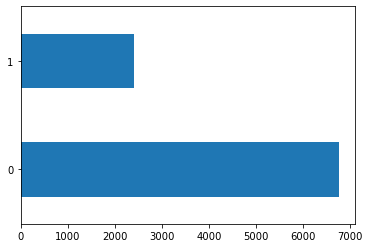

In [123]:
dataset1.outcome.value_counts().plot(kind='barh')

In [20]:
s = dataset1.isna().sum()

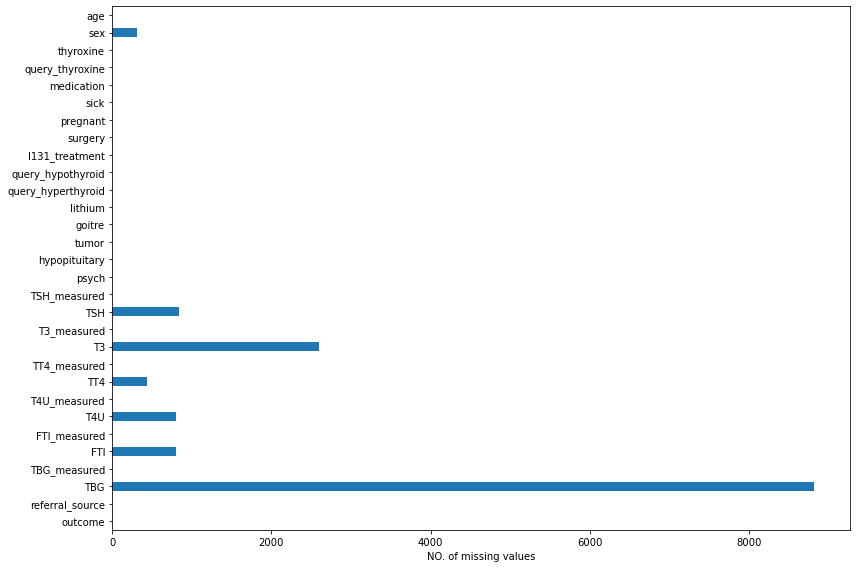

In [21]:
#visualising null values
plt.figure(figsize=(12,8))
s[::-1].plot(kind='barh')
plt.xlabel('NO. of missing values')
plt.tight_layout()
plt.show()

In [124]:
#drop the  columns with high missing values
dataset1.drop(['TBG_measured','TBG','T3_measured','TSH_measured','TT4_measured','T4U_measured','FTI_measured'],axis=1,inplace=True)


In [125]:
dataset1.shape

(9171, 23)

In [126]:
dataset1.head(2)

,age,sex,thyroxine,query_thyroxine,medication,sick,pregnant,surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,outcome
0,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.6,1.9,128,NaN,NaN,other,0
1,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,NaN,NaN,NaN,NaN,NaN,other,0


In [127]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 9171 non-null   int64 
 1   sex                 8864 non-null   object
 2   thyroxine           9171 non-null   object
 3   query_thyroxine     9171 non-null   object
 4   medication          9171 non-null   object
 5   sick                9171 non-null   object
 6   pregnant            9171 non-null   object
 7   surgery             9171 non-null   object
 8   I131_treatment      9171 non-null   object
 9   query_hypothyroid   9171 non-null   object
 10  query_hyperthyroid  9171 non-null   object
 11  lithium             9171 non-null   object
 12  goitre              9171 non-null   object
 13  tumor               9171 non-null   object
 14  hypopituitary       9171 non-null   object
 15  psych               9171 non-null   object
 16  TSH                 8329

In [128]:
# Detecting outlier in age column
dataset1.describe()

,age,outcome
count,9171.000000,9171.000000
mean,73.560680,0.261804
std,1184.041182,0.439640
min,1.000000,0.000000
25%,37.000000,0.000000
50%,55.000000,0.000000
75%,68.000000,1.000000
max,65526.000000,1.000000


In [129]:
dataset1.drop(dataset1[dataset1.age <20].index,inplace=True)

In [131]:
# there are some impractical values of age present in the data
# dataset[(dataset['age']<20) | (dataset['age'] > 100) ] 
# dataset1.drop(dataset1[dataset1.age <20 | dataset1.age >100].index,inplace=True)
dataset1.drop(dataset1[dataset1.age >100].index,inplace=True)

<AxesSubplot:>

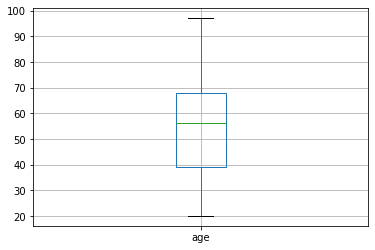

In [132]:
dataset1.boxplot('age')

In [30]:
#converting columns into float type
# dataset1[['TSH','T3','TT4','T4U','FTI']] =  dataset1[['TSH','T3','TT4','T4U','FTI']].astype(object)

In [133]:
dataset1.head(1)

,age,sex,thyroxine,query_thyroxine,medication,sick,pregnant,surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,outcome
0,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.6,1.9,128,NaN,NaN,other,0


In [134]:
dataset1.dtypes

age                    int64
sex                   object
thyroxine             object
query_thyroxine       object
medication            object
sick                  object
pregnant              object
surgery               object
I131_treatment        object
query_hypothyroid     object
query_hyperthyroid    object
lithium               object
goitre                object
tumor                 object
hypopituitary         object
psych                 object
TSH                   object
T3                    object
TT4                   object
T4U                   object
FTI                   object
referral_source       object
outcome                int64
dtype: object

In [135]:
s=dataset1.isna().sum()

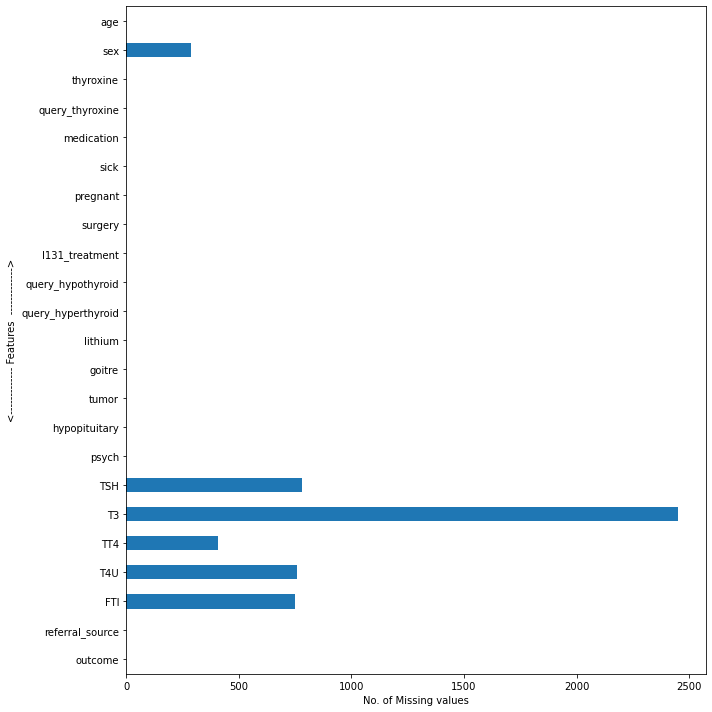

In [34]:
plt.figure(figsize=(10,10))
s[::-1].plot(kind='barh')
plt.xlabel('No. of Missing values')
plt.ylabel('<------------- Features  ------------->')
plt.tight_layout()
plt.show()

In [136]:
dataset1[['TSH','T3','TT4','T4U','FTI']] =  dataset1[['TSH','T3','TT4','T4U','FTI']].astype(float)

In [137]:
dataset1[['TSH','T3','TT4','T4U','FTI']].dtypes

TSH    float64
T3     float64
TT4    float64
T4U    float64
FTI    float64
dtype: object

In [138]:
# dataset1.to_csv('thyroid_data.csv',index=False,header=True)

<AxesSubplot:>

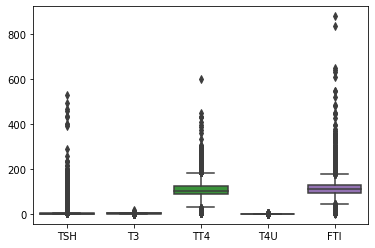

In [37]:
sns.boxplot(data= dataset1[['TSH','T3','TT4','T4U','FTI']])
# column values contains a outliers so we can not use mean to fill missing values

In [38]:
dataset1[['TSH','T3','TT4','T4U','FTI']].median()

TSH      1.40
T3       1.90
TT4    104.00
T4U      0.96
FTI    109.00
dtype: float64

In [39]:
# filt  = lambda x: 0 if x == np.nan else x
# dataset['TSH'] = map(filt, dataset['TSH'])

In [40]:
# we fill missing values by using median
filt =( dataset1['TSH'].isna())
dataset1['TSH'] = np.where(filt,dataset1['TSH'].median(),dataset1['TSH'])

filt =( dataset1['T3'].isna())
dataset1['T3'] = np.where(filt,dataset1['T3'].median(),dataset1['T3'])

filt =( dataset1['TT4'].isna())
dataset1['TT4'] = np.where(filt,dataset1['TT4'].median() ,dataset1['TT4'])

filt =( dataset1['T4U'].isna())
dataset1['T4U'] = np.where(filt,dataset1['T4U'].median() ,dataset1['T4U'])

filt =( dataset1['FTI'].isna())
dataset1['FTI'] = np.where(filt,dataset1['FTI'].median() ,dataset1['FTI'])

filt =( dataset1['sex'].isna())
dataset1['sex'] = np.where(filt,dataset1['sex'].mode() ,dataset1['sex'])
           

In [41]:
dataset1.isna().sum()

age                   0
sex                   0
thyroxine             0
query_thyroxine       0
medication            0
sick                  0
pregnant              0
surgery               0
I131_treatment        0
query_hypothyroid     0
query_hyperthyroid    0
lithium               0
goitre                0
tumor                 0
hypopituitary         0
psych                 0
TSH                   0
T3                    0
TT4                   0
T4U                   0
FTI                   0
referral_source       0
outcome               0
dtype: int64

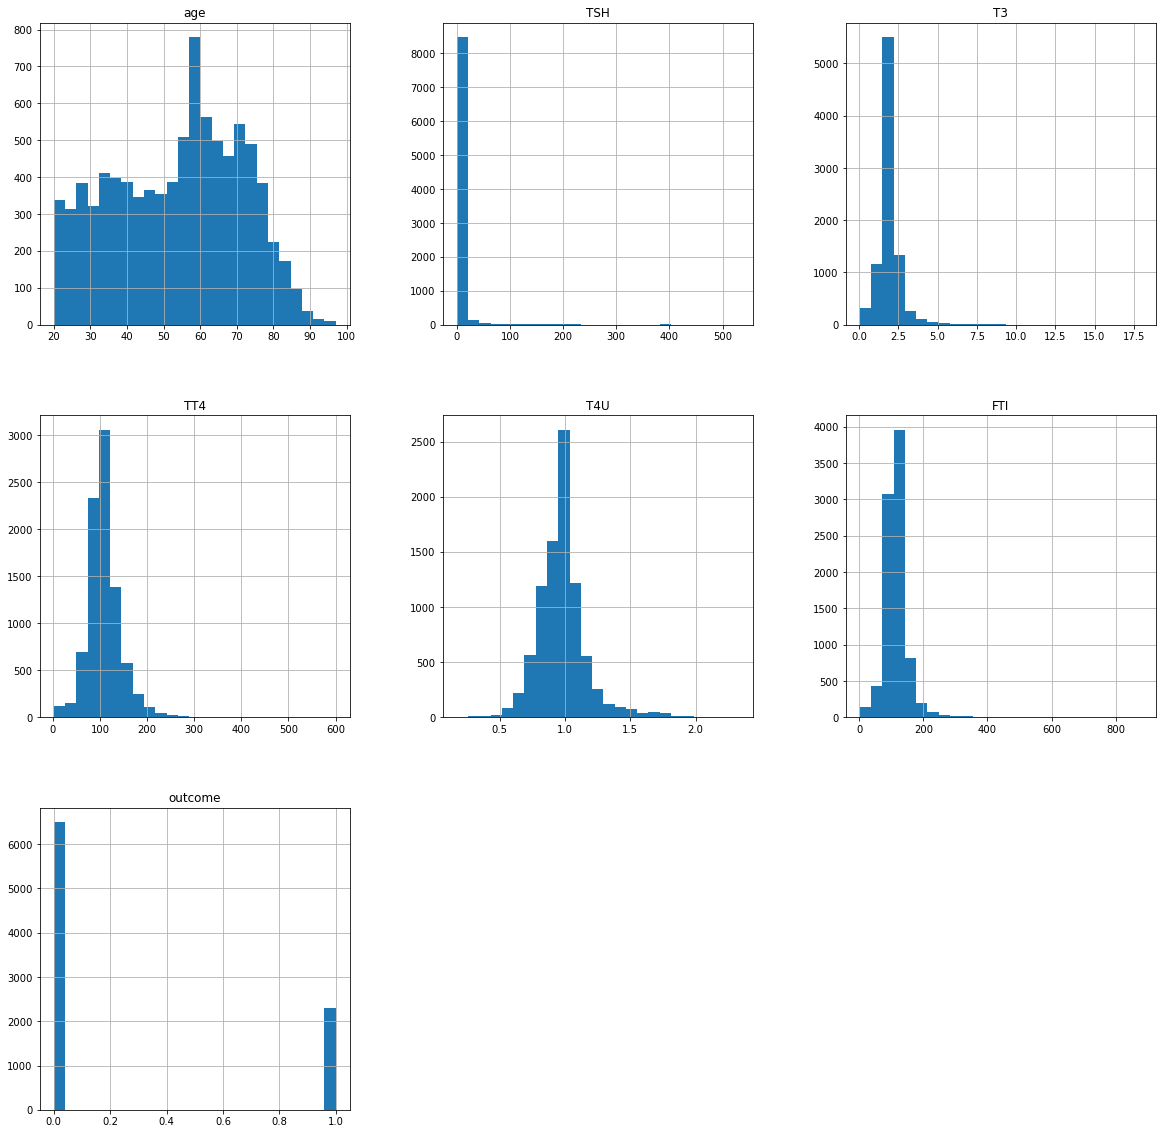

In [42]:
#Check the distribution
dataset1.hist(bins=25,figsize=(20,20));

### The features 'T3', 'TT4' , 'T4U' , 'FTI'  are approximately  normally distributed so we can use Z-score method to remove outliers

C:\Users\DKG\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TSH', ylabel='Density'>

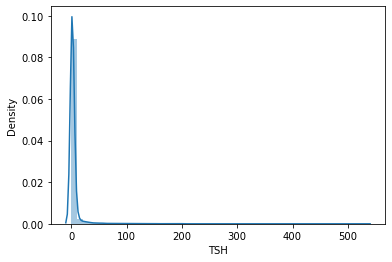

In [43]:
sns.distplot(dataset1.TSH,kde = True)

In [44]:
#checking summary statistics before handling outliers
dataset1.describe()

,age,TSH,T3,TT4,T4U,FTI,outcome
count,8786.000000,8786.000000,8786.000000,8786.000000,8786.000000,8786.000000,8786.000000
mean,53.714318,4.627723,1.942464,108.467865,0.973834,113.301962,0.260642
std,17.595942,20.923992,0.750745,36.606361,0.190887,39.842914,0.439010
min,20.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.000000
25%,39.000000,0.560000,1.700000,88.000000,0.870000,95.000000,0.000000
50%,56.000000,1.400000,1.900000,104.000000,0.960000,109.000000,0.000000
75%,68.000000,2.500000,2.100000,124.000000,1.050000,126.000000,1.000000
max,97.000000,530.000000,18.000000,600.000000,2.330000,881.000000,1.000000


In [45]:
q3, q1 = np.percentile(dataset1['TSH'], [75 ,25])
iqr = q3 - q1

In [46]:
upper_fence = q3 + (1.5 * iqr)

In [47]:
lower_fence = q1 -  (1.5 * iqr)

In [48]:
print(iqr,upper_fence,lower_fence)

1.94 5.41 -2.35


###  Handling outliers using IQR

In [49]:
dataset1['TSH'] = np.where(dataset1['TSH']>=upper_fence,upper_fence,dataset1['TSH'])


In [50]:
dataset1['TSH'] = np.where(dataset1['TSH']<=lower_fence,lower_fence,dataset1['TSH'])


<AxesSubplot:title={'center':'After removing outlier using IQR'}>

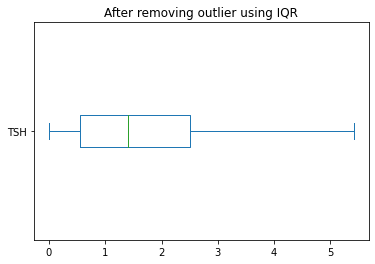

In [51]:
dataset1['TSH'].plot(kind='box',vert=False,title='After removing outlier using IQR')


In [101]:
# sns.distplot(dataset1.TSH,kde = True)

## For the Features (i.e. ['T3','TT4','T4U','FTI'] ) which follows approximately normal distribution, We will use Z-score treatment to remove outliers 

In [53]:
dataset1[['T3','TT4','T4U','FTI']].describe()

,T3,TT4,T4U,FTI
count,8786.000000,8786.000000,8786.000000,8786.000000
mean,1.942464,108.467865,0.973834,113.301962
std,0.750745,36.606361,0.190887,39.842914
min,0.050000,2.000000,0.170000,1.400000
25%,1.700000,88.000000,0.870000,95.000000
50%,1.900000,104.000000,0.960000,109.000000
75%,2.100000,124.000000,1.050000,126.000000
max,18.000000,600.000000,2.330000,881.000000


<AxesSubplot:title={'center':'FTI_Before_zscore'}, ylabel='Frequency'>

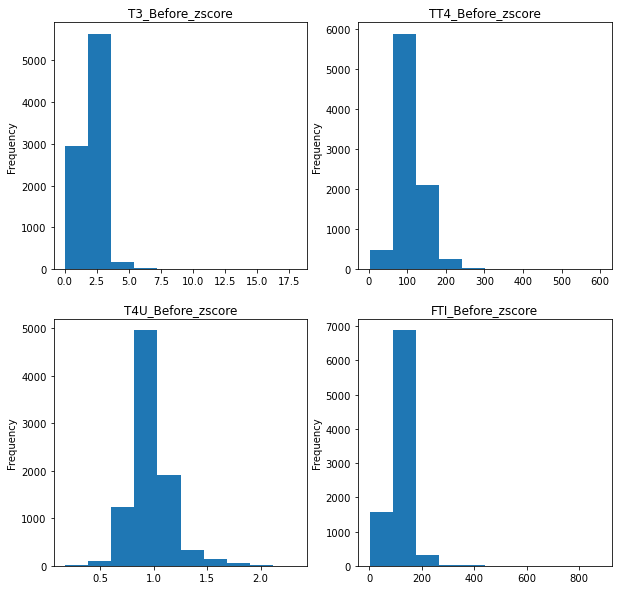

In [54]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
dataset1['T3'].plot(kind='hist',title= 'T3_Before_zscore')
plt.subplot(2,2,2)
dataset1['TT4'].plot(kind='hist',title= 'TT4_Before_zscore')
plt.subplot(2,2,3)
dataset1['T4U'].plot(kind='hist',title= 'T4U_Before_zscore')
plt.subplot(2,2,4)
dataset1['FTI'].plot(kind='hist',title= 'FTI_Before_zscore')


In [55]:
# plt.figure(figsize=(16,5))
# plt.subplot(1,2,1)
# sns.distplot(dataset1['TT4'])
# plt.subplot(1,2,2)
# sns.distplot(dataset1['FTI'])
# plt.show()

In [56]:
# col=['T3','TT4','T4U','FTI']
# for i in col:
    
#     d[i].plot(kind='hist',title='After')
#     plt.show()


In [57]:
features =['T3','TT4','T4U','FTI']

In [58]:
#Handling outlier usig z-score treatment
for feature in features:
    upper_limit = dataset1[feature].mean() + 3*dataset1[feature].std()
    lower_limit = dataset1[feature].mean() - 3*dataset1[feature].std()
    dataset1[feature] = np.where(dataset1[feature]>upper_limit,upper_limit,
                                          np.where(dataset1[feature]<lower_limit,lower_limit,
                                                            dataset1[feature]))
                                            
                                            


In [59]:
# After handling outliers
dataset1[['T3','TT4','T4U','FTI']].describe()

,T3,TT4,T4U,FTI
count,8786.000000,8786.000000,8786.000000,8786.000000
mean,1.922357,107.940026,0.970927,112.263216
std,0.628652,33.998746,0.177548,32.674449
min,0.050000,2.000000,0.401172,1.400000
25%,1.700000,88.000000,0.870000,95.000000
50%,1.900000,104.000000,0.960000,109.000000
75%,2.100000,124.000000,1.050000,126.000000
max,4.194698,218.286949,1.546495,232.830705


<AxesSubplot:title={'center':'FTI_After_zscore'}, ylabel='Frequency'>

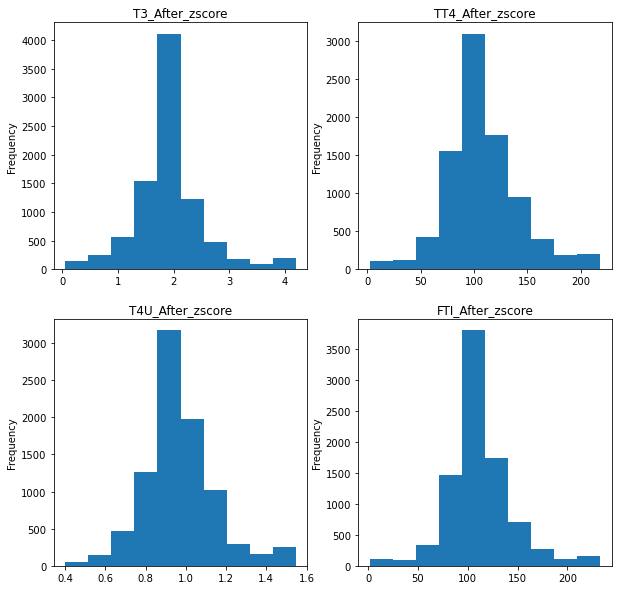

In [60]:
#After z-score
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
dataset1['T3'].plot(kind='hist',title= 'T3_After_zscore')
plt.subplot(2,2,2)
dataset1['TT4'].plot(kind='hist',title= 'TT4_After_zscore')
plt.subplot(2,2,3)
dataset1['T4U'].plot(kind='hist',title= 'T4U_After_zscore')
plt.subplot(2,2,4)
dataset1['FTI'].plot(kind='hist',title= 'FTI_After_zscore')


In [61]:
# warnings.filterwarnings('ignore')
# plt.figure(figsize=(16,5))
# plt.subplot(1,2,1)
# sns.distplot(dataset1['TT4'])
# plt.subplot(1,2,2)
# sns.distplot(dataset1['FTI'])
# plt.show()

## Categorical variables

In [62]:
#categorical features
cat_features = [feature for feature in dataset1.columns if dataset1[feature].dtypes=="O"]
print(cat_features,len(cat_features))

['sex', 'thyroxine', 'query_thyroxine', 'medication', 'sick', 'pregnant', 'surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'referral_source'] 16


In [63]:
dataset1[cat_features].head()

,sex,thyroxine,query_thyroxine,medication,sick,pregnant,surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,referral_source
0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,other
1,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,other
2,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,other
3,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,other
4,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,other


In [64]:
for feature in cat_features:
    print(dataset1[feature].value_counts())

F    6131
M    2655
Name: sex, dtype: int64
f    7594
t    1192
Name: thyroxine, dtype: int64
f    8634
t     152
Name: query_thyroxine, dtype: int64
f    8674
t     112
Name: medication, dtype: int64
f    8448
t     338
Name: sick, dtype: int64
f    8685
t     101
Name: pregnant, dtype: int64
f    8658
t     128
Name: surgery, dtype: int64
f    8619
t     167
Name: I131_treatment, dtype: int64
f    8187
t     599
Name: query_hypothyroid, dtype: int64
f    8163
t     623
Name: query_hyperthyroid, dtype: int64
f    8693
t      93
Name: lithium, dtype: int64
f    8705
t      81
Name: goitre, dtype: int64
f    8560
t     226
Name: tumor, dtype: int64
f    8784
t       2
Name: hypopituitary, dtype: int64
f    8383
t     403
Name: psych, dtype: int64
other    5211
SVI      2343
SVHC      932
STMW      227
SVHD       70
WEST        3
Name: referral_source, dtype: int64


In [65]:
# dataset1.columns
dataset1.referral_source.nunique()

6

In [66]:
#Encoding
dataset1= dataset1.replace({'F':1,'M':0,'t':1,'f':0})
dataset1.head()

,age,sex,thyroxine,query_thyroxine,medication,sick,pregnant,surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,outcome
0,29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.6,1.9,128.0,0.96,109.0,other,0
1,41,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.4,1.9,104.0,0.96,109.0,other,0
2,36,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,104.0,0.96,109.0,other,0
3,32,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,104.0,0.96,109.0,other,1
4,60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,104.0,0.96,109.0,other,0


In [67]:
# df = pd.get_dummies(df,columns=["referral source"])
# df.head()
dataset1=pd.get_dummies(dataset1,columns=['referral_source'],drop_first=True)
dataset1.head()

,age,sex,thyroxine,query_thyroxine,medication,sick,pregnant,surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,outcome,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_WEST,referral_source_other
0,29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.6,1.9,128.0,0.96,109.0,0,0,0,0,0,1
1,41,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.4,1.9,104.0,0.96,109.0,0,0,0,0,0,1
2,36,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,104.0,0.96,109.0,0,0,0,0,0,1
3,32,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,104.0,0.96,109.0,1,0,0,0,0,1
4,60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,104.0,0.96,109.0,0,0,0,0,0,1


In [68]:
dataset1.sex.unique()

array([1, 0], dtype=int64)

In [69]:
#data type conversion
dataset1['referral_source_SVI'] = dataset1['referral_source_SVI'].astype('int64')
dataset1['referral_source_SVHC'] = dataset1['referral_source_SVHC'].astype('int64')
dataset1['referral_source_WEST'] = dataset1['referral_source_WEST'].astype('int64')
dataset1['referral_source_SVHD'] = dataset1['referral_source_SVHD'].astype('int64')
dataset1['referral_source_other'] = dataset1['referral_source_other'].astype('int64')

In [70]:
dataset1.dtypes

age                        int64
sex                        int64
thyroxine                  int64
query_thyroxine            int64
medication                 int64
sick                       int64
pregnant                   int64
surgery                    int64
I131_treatment             int64
query_hypothyroid          int64
query_hyperthyroid         int64
lithium                    int64
goitre                     int64
tumor                      int64
hypopituitary              int64
psych                      int64
TSH                      float64
T3                       float64
TT4                      float64
T4U                      float64
FTI                      float64
outcome                    int64
referral_source_SVHC       int64
referral_source_SVHD       int64
referral_source_SVI        int64
referral_source_WEST       int64
referral_source_other      int64
dtype: object

In [71]:
#correlation checking
corr = dataset1.corr()
corr

,age,sex,thyroxine,query_thyroxine,medication,sick,pregnant,surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,outcome,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_WEST,referral_source_other
age,1.000000,-0.009825,0.002485,-0.022056,-0.056452,0.070179,-0.133572,-0.028853,0.048353,0.050486,-0.047507,-0.045728,-0.071059,-0.047091,-0.024196,-0.091987,0.068675,-0.225589,-0.064477,-0.160994,0.036195,0.038360,-0.134984,0.029177,0.270256,-0.025259,-0.102173
sex,-0.009825,1.000000,0.102204,-0.045751,0.021751,-0.011420,0.070965,0.038641,0.009920,0.069828,0.063986,-0.031235,0.006424,0.070916,-0.006500,-0.100967,0.052478,0.052773,0.156166,0.218457,0.024081,0.089212,-0.166906,0.017154,-0.112085,0.012162,0.167854
thyroxine,0.002485,0.102204,1.000000,0.006062,-0.009466,-0.048140,0.010281,0.021177,0.071423,0.110418,-0.031755,-0.005253,0.000037,-0.009787,0.016054,-0.064624,-0.045150,0.004903,0.223128,0.052493,0.197048,0.066867,-0.105178,0.009358,-0.192317,0.028658,0.238171
query_thyroxine,-0.022056,-0.045751,0.006062,1.000000,-0.015077,-0.008385,0.018447,0.005723,-0.018469,-0.015110,-0.029853,-0.013724,0.005468,-0.005017,0.113724,-0.029092,-0.028172,-0.010968,-0.004201,-0.031081,0.017441,0.000760,-0.045707,0.007747,-0.038560,-0.002452,0.069030
medication,-0.056452,0.021751,-0.009466,-0.015077,1.000000,-0.022729,0.025816,-0.005349,0.006473,-0.026711,0.099050,-0.011753,-0.010961,-0.018464,-0.001715,-0.024914,-0.007216,0.097749,0.002980,0.042244,-0.029556,0.013424,-0.039144,-0.010183,-0.066230,-0.002100,0.081727
sick,0.070179,-0.011420,-0.048140,-0.008385,-0.022729,1.000000,-0.021570,-0.009504,-0.027843,0.006941,-0.029897,-0.009124,-0.019295,-0.002595,-0.003018,-0.032541,0.002991,-0.068311,-0.035553,-0.021101,-0.025267,-0.009567,-0.059295,0.248336,0.062714,-0.003697,-0.053569
pregnant,-0.133572,0.070965,0.010281,0.018447,0.025816,-0.021570,1.000000,-0.004201,-0.015011,-0.024933,0.070044,-0.011154,0.034284,0.097135,-0.001627,-0.013437,-0.053638,0.153384,0.134802,0.254360,-0.027802,0.108660,-0.026746,-0.009664,-0.065031,0.055798,-0.041085
surgery,-0.028853,0.038641,0.021177,0.005723,-0.005349,-0.009504,-0.004201,1.000000,0.003945,0.001030,0.021923,-0.012576,-0.011729,0.004245,-0.001835,-0.026659,0.023683,-0.002284,-0.002677,0.024457,-0.015735,-0.011603,-0.041885,0.010473,-0.023917,-0.002247,0.042701
I131_treatment,0.048353,0.009920,0.071423,-0.018469,0.006473,-0.027843,-0.015011,0.003945,1.000000,0.051637,0.042730,-0.014397,-0.013427,-0.022618,-0.002100,-0.030520,0.015489,0.025253,-0.006110,0.013764,-0.012274,0.002796,-0.047950,-0.012474,-0.080171,-0.002573,0.111901
query_hypothyroid,0.050486,0.069828,0.110418,-0.015110,-0.026711,0.006941,-0.024933,0.001030,0.051637,1.000000,0.009722,-0.010327,-0.021367,-0.023984,-0.004082,-0.037721,0.103690,-0.056655,-0.025384,0.015627,-0.038735,0.055420,-0.074114,0.011315,-0.024240,0.019443,0.070533


<AxesSubplot:>

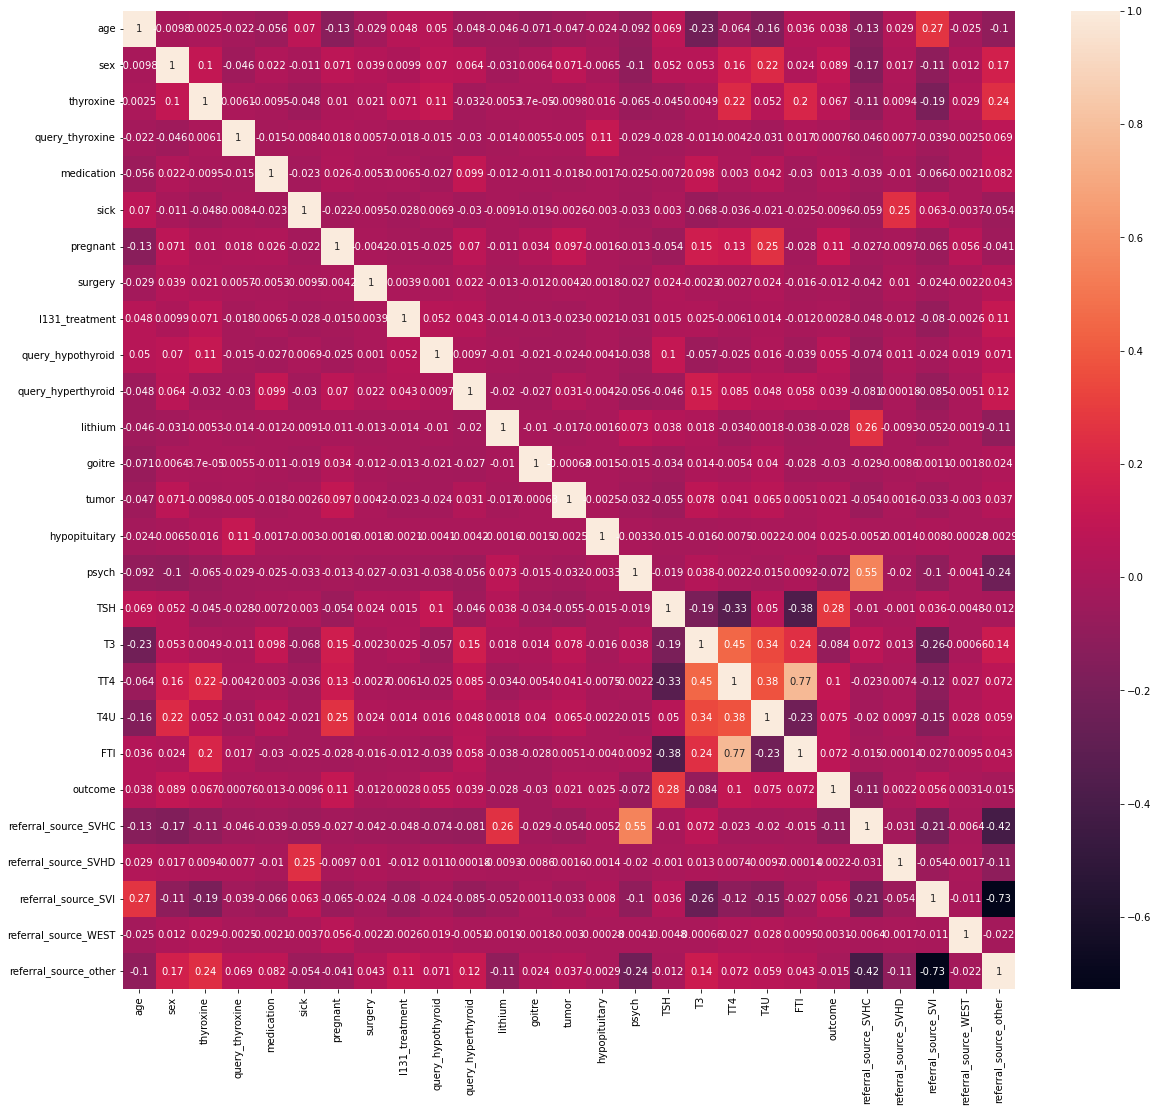

In [72]:
plt.figure(figsize=(20,18))
sns.heatmap(corr,annot=True,)

###  Spliting the dataset

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
df= dataset1.copy()
X=df.drop(columns = 'outcome')
y = df['outcome']

In [75]:
# print(x,y)

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=119)

In [77]:
X_train

,age,sex,thyroxine,query_thyroxine,medication,sick,pregnant,surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_WEST,referral_source_other
662,57,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.30,2.0,104.0,0.96,109.0,0,0,0,0,1
6695,60,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.20,1.6,104.0,0.99,105.0,0,0,1,0,0
5959,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.40,2.6,91.0,0.67,135.0,0,0,0,0,1
2226,56,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.60,1.9,117.0,1.11,105.0,0,0,0,0,1
2058,51,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.40,1.9,151.0,1.06,142.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,58,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.30,2.7,116.0,1.13,103.0,1,0,0,0,0
27,75,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.05,1.6,157.0,0.89,176.0,0,0,1,0,0
7925,29,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.66,2.1,109.0,1.14,96.0,0,0,0,0,1
2564,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.30,1.9,62.0,0.77,81.0,0,0,1,0,0


In [78]:
y_train

662     0
6695    0
5959    0
2226    0
2058    0
       ..
8329    0
27      1
7925    0
2564    0
2597    0
Name: outcome, Length: 7028, dtype: int64

###  Feature selection using SelectKBest

In [79]:
from sklearn.feature_selection import SelectKBest

In [80]:
from sklearn.feature_selection import chi2, f_regression


In [81]:
obj = SelectKBest(chi2, k=4)
obj.fit_transform(X_train,y_train)
filter = obj.get_support()
filter

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False,  True, False, False, False, False, False])

In [82]:
feature = X_train.columns
top_4 = feature[filter]
print(top_4,'T3','T4U')

Index(['age', 'TSH', 'TT4', 'FTI'], dtype='object') T3 T4U


In [83]:
final_f = ['TSH', 'TT4', 'FTI', 'age', 'T3','T4U']

In [84]:
X_train_new = X_train[final_f]

In [85]:
Xtest = X_test[final_f]

### Model building and evaluation

In [86]:
from sklearn.metrics import (accuracy_score,balanced_accuracy_score,
                            cohen_kappa_score,precision_score,recall_score,
                             f1_score,roc_curve,roc_auc_score)

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
model = LogisticRegression()
LR = model.fit(X_train_new,y_train)

y_pred = model.predict(Xtest)

acc = accuracy_score(y_pred,y_test)*100
print('accuracy score is {} %'.format(acc))

accuracy score is 77.81569965870307 %


In [89]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
clf = tree.fit(X_train_new,y_train)
treepredict = clf.predict(Xtest)
acc = accuracy_score(treepredict,y_test)*100
print('accuracy score is {} %'.format(acc))

accuracy score is 89.59044368600682 %


In [102]:
# from sklearn import tree
# features = ['TSH', 'TT4', 'FTI', 'age', 'T3','T4U']

In [103]:
#visualise the tree
# plt.figure(figsize=(15,7))
# tree.plot_tree(clf,feature_names=features,filled=True,fontsize=7)

In [92]:
from sklearn.svm import SVC
svm = SVC(probability=True)
sclf = svm.fit(X_train_new,y_train)
svc_pred = sclf.predict(Xtest)
acc = accuracy_score(svc_pred,y_test)*100
print('accuracy score is {} %'.format(acc))

accuracy score is 82.93515358361775 %


In [93]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
knnclf = neigh.fit(X_train_new,y_train)
knn_pred = knnclf.predict(Xtest)
acc = accuracy_score(knn_pred,y_test)*100
print('accuracy score is {} %'.format(acc))

accuracy score is 81.79749715585893 %


In [94]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rclf = rf.fit(X_train_new,y_train)
rf_pred = rclf.predict(Xtest)
acc = accuracy_score(rf_pred,y_test)*100
print('accuracy score is {} %'.format(acc))

accuracy score is 93.62912400455062 %


###  ROC , AUC Score

In [95]:
pred_prob1 = model.predict_proba(Xtest)
pred_prob2 = clf.predict_proba(Xtest)
pred_prob3 = sclf.predict_proba(Xtest)
pred_prob4 = knnclf.predict_proba(Xtest)
pred_prob5 = rclf.predict_proba(Xtest)

In [96]:
fpr1,tpr1,thresh1 = roc_curve(y_test,pred_prob1[:,1],pos_label=1)#logistic regression
fpr2,tpr2,thresh2 = roc_curve(y_test,pred_prob2[:,1],pos_label=1)#Decision Tree
fpr3,tpr3,thresh3 = roc_curve(y_test,pred_prob3[:,1],pos_label=1)#Support vector
fpr4,tpr4,thresh4 = roc_curve(y_test,pred_prob4[:,1],pos_label=1)#knn
fpr5,tpr5,thresh5 = roc_curve(y_test,pred_prob5[:,1],pos_label=1)#random forest

In [97]:
random_probs = [ 0 for i in range(len(y_test))]
p_fpr,p_tpr,_ = roc_curve(y_test,random_probs,pos_label=1)

In [140]:
# random_probs

In [98]:
# roc auc score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test,pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test,pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test,pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test,pred_prob5[:,1])
print(auc_score1,auc_score2,auc_score3,auc_score4,auc_score5)

0.7422086306489977 0.8587427794767244 0.8734301732925586 0.7929068977234117 0.9805946313285762


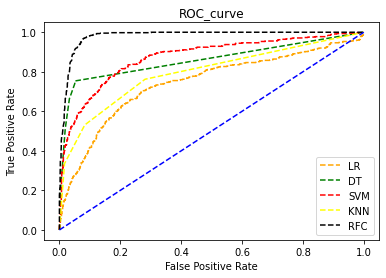

In [99]:
#Roc curve 
plt.plot(fpr1,tpr1,linestyle='--',color='orange',label='LR')
plt.plot(fpr2,tpr2,linestyle='--',color='green',label='DT')
plt.plot(fpr3,tpr3,linestyle='--',color='red',label='SVM')
plt.plot(fpr4,tpr4,linestyle='--',color='yellow',label='KNN')
plt.plot(fpr5,tpr5,linestyle='--',color='black',label='RFC')
plt.plot(p_fpr,p_tpr,linestyle='--',color='blue')
plt.title('ROC_curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()